In [ ]:
!pip install pandas matplotlib seaborn

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Assignment 1 - Exploratory Data Analysis**

Group: #45

Isaac Lafond - 300191954

## **Dataset 1 - Mobile Device Usage Data**

**Introduction:** This analysis aims to identify usage patterns and behaviours as well as trend about the users with respect to their devices. The insight found in this report could be useful in mobile device marketing to effectively communicate the desired message based on the insight presented here.

**Dataset Description:**

This dataset by Vala Khorasani, contains mobile device user behaviour data used to analyze mobile user behaviour patterns. It's comprised of 700 data points (rows) with 11 features:
1.   **User ID:** unique ID given to each user (numerical value 1-700).
2.   **Device model:** the device model used by the user (5 device categories: Google Pixel 5, OnePlus 9, Xiaomi Mi 11, iPhone 12 and Samsung Galaxy S21).
3.   **Operating System:** OS of the mobile device used (2 OS categories: Android or iOS).
4.   **App Usage Time (min/day):** The daily time spent on Mobile application (numerical value measured in minutes per day).
5.   **Screen on Time (hours/day):** The average daily duration the screen is active (numerical value measured in hours per day).
6.   **Battery Drain (mAh/day):** The daily battery consumption (numerical value measured in milliampere-hours per day).
7.   **Number of App Installed:** Total number of apps installed on the device (numerical value).
8.   **Data Usage (MB/day):** Daily mobile data consumption (numerical value measured in megabytes per day).
9.   **Age:** Age of the user (numerical value).
10.   **Gender:** Gender of the user (2 cateogries: Male or Female).
11.   **User Behaviour Class:** Classification of user behaviour based on usage patterns (categorical value 1 to 5 where 1 signifies light usage and 5 signifies extreme usage).

**Note:** This dataset is generated based on simulated user behaviour to reflect a diverse range of mobile usage senarios and was primarily designed to implement machine learning algorithms and is not a reliable source for papers and articles. This means, depending on the means of the simulation, the values in this dataset may not truly reflect real world continuous measurements.

In [3]:
# Read dataset from public github repo
df1 = pd.read_csv("https://raw.githubusercontent.com/IsaacLafond/CSI-4142---Fundamentals-of-Data-Science/main/Assignment%201/datasets/user_behavior_dataset.csv")

### Insights

#### Insight 1 - Data Usage Distribution

The majority of users use less than 1GB (1000MB) of mobile data daily.

count     700.000000
mean      929.742857
std       640.451729
min       102.000000
25%       373.000000
50%       823.500000
75%      1341.000000
max      2497.000000
Name: Data Usage (MB/day), dtype: float64


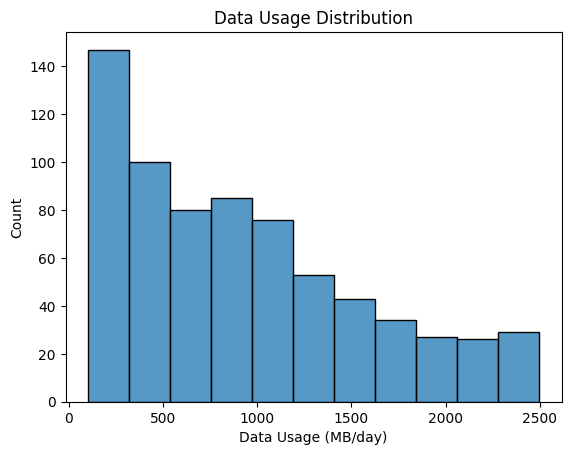

In [4]:
# Print the descriptive statistics of the data usage column
print(df1['Data Usage (MB/day)'].describe()) # [1]

# Histogram of the age of the users in the dataset
sns.histplot(data=df1, x="Data Usage (MB/day)")
plt.title("Data Usage Distribution")
plt.show()

We can see that the majority of users use less than 1GB of data daily by viewing the a histogram of the datapoints and observing the distribution (r1). By observing the "Data Usage Distribution" graph above we notice that the histogram is front loaded meaning a larger amount of users don't use large amounts of data compared to the rests of users. Then by using the descriptive statistics, we can see the 50% quantile value is 823.5 MB/day meaning that 50% of the users use less than 823.5 MB/day. We can then round up to 1GB (1000MB) and conclude that the majority of users use less than 1 GB/day of data.

#### Insight 2 - Operating Systems Comparison

Android devices are much more common than iOS devices.

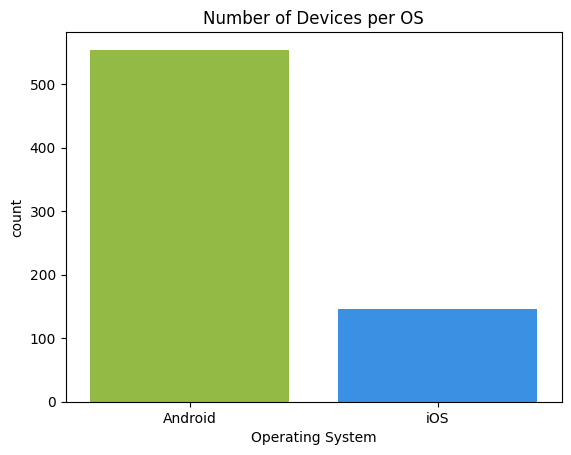

In [114]:
# Countplot comparing the number of android and iOS devices
sns.countplot(data=df1, x="Operating System", hue="Operating System", palette={"Android":"yellowgreen","iOS":"dodgerblue"})
plt.title("Number of Devices per OS")
plt.show()

To determine the more common mobile operting system between Android and iOS we can create a countplot which displays the number of devices using each OS (r2). When observing the resulting graph "Number of Devices per OS", it's clear that Android devices are more common than iOS devices.

#### Insight 3 - Device Type Count

The type of device is evenly distributed.

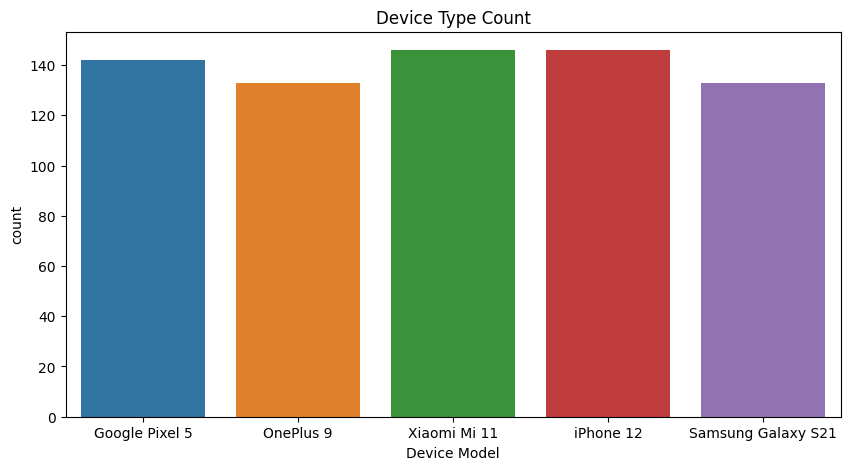

In [13]:
# Countplot of the number of different types of devices
plt.figure(figsize=(10,5))
sns.countplot(data=df1, x="Device Model", hue="Device Model") # [1]
plt.title("Device Type Count")
plt.show()

We can determine the number of each device by creating a countplot which shows the total number of each device (r2). The resulting graph "Device Type Count" shows an even distribution in the number of occurences of each device type. The number of each device type fluctuates around 140 meaning the dataset evenly represents each device and findings based on the device type don't need to be concerned by any disparity towards a more promenant device type making useful and representative to use for identifying usage patterns accross different devices.

#### Insight 4 - Battery Drain per Device Type

The device type that consume the least amount of battery per day is the Google Pixel 5.

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64


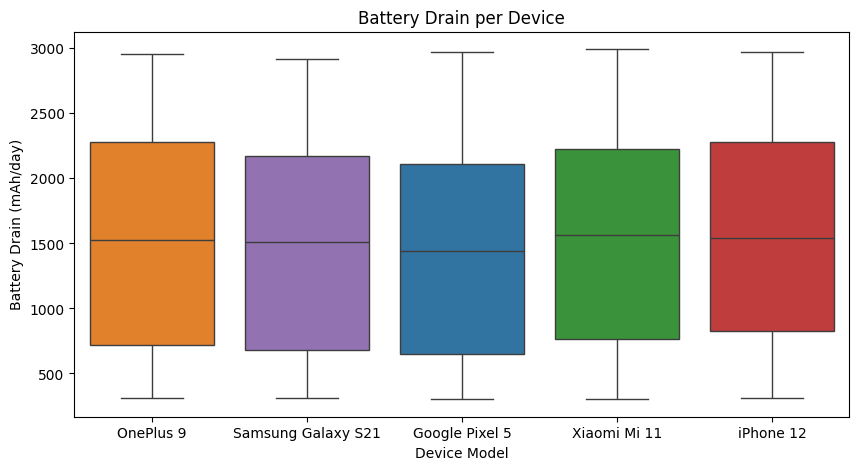

In [40]:
# Sort the device types by increasing counts
device_counts = df1["Device Model"].value_counts().sort_values().index # [5]
# Show the counts of the device types
print(df1["Device Model"].value_counts())

# Boxplot showing the battery drain per device type
plt.figure(figsize=(10, 5))
sns.boxplot(data=df1, order=device_counts, x="Device Model", y="Battery Drain (mAh/day)", hue="Device Model")
plt.title("Battery Drain per Device")
plt.show()

The device that uses the least amount of battery per day can be determined by creating a boxplot of the battery drain values for each device type (r5). In the graph "Battery Drain per Device", the devices are sorted from left to right in ascending order with respect to their count. By observing the graph we can see that the box (mean/interquartile range) of the Google Pixel 5 is the lowest suggesting that it is the most battery efficient device as it consumes the lowest amount of battery per day compared to the other devices.

#### Insight 5 - Number of Apps Installed per Operating System

iOS device tend to have a higher number of installed apps compared to Android devices.

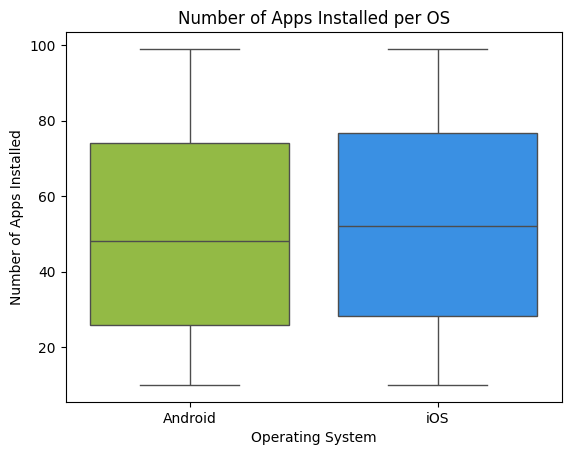

In [53]:
# Split data between operating systems
sns.boxplot(data=df1, x="Operating System", y="Number of Apps Installed", hue="Operating System", palette={"Android":"yellowgreen","iOS":"dodgerblue"})
plt.title("Number of Apps Installed per OS")
plt.show()

The operating systems that is more likely to install more apps can be determined by creating a boxplot with respect to the number of apps intalled per OS (r4). In the resulting graph "Number of Apps Installed per OS" we see that the box for iOS is higher than the one for Android suggesting that iOS users are more likely to install more applications on their device compared to Android users.

#### Insight 6 - Data Usage per Operating System

Android device tend to use less data compared to iOS devices.

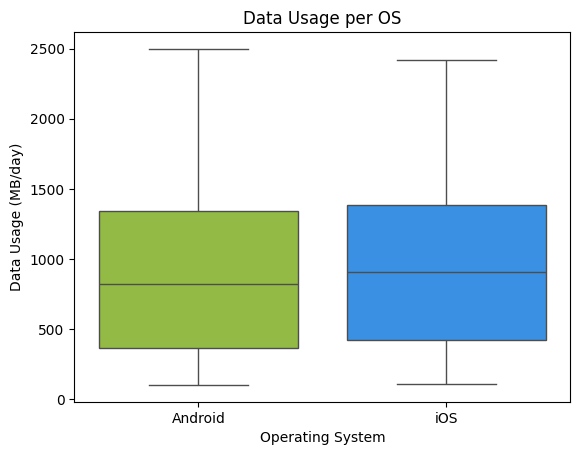

In [111]:
# Data usage per OS
sns.boxplot(data=df1, x="Operating System", y="Data Usage (MB/day)", hue="Operating System", palette={"Android":"yellowgreen","iOS":"dodgerblue"})
plt.title("Data Usage per OS")
plt.show()

In order to determine which operating system is more likely to consume more mobile data we can create a boxplot with respect to the Data Usage values (r4). When observing the resulting graph "Data Usage per OS", we see that iOS device are more likely to have a higher data usage per day when compared to Android devices.

#### Insight 7 - Correlation Between the Number of Apps Installed and Data Usage

There's a strong correlation between the number of apps installed and data usage per day.

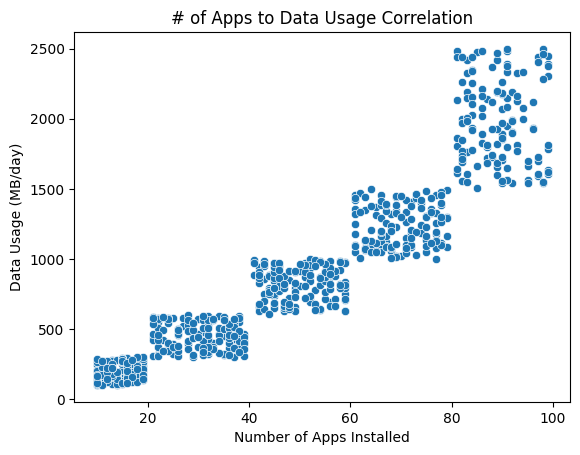

                          Data Usage (MB/day)  Number of Apps Installed
Data Usage (MB/day)                    1.0000                    0.9348
Number of Apps Installed               0.9348                    1.0000


In [116]:
# Scatter plot for # apps to data usage
sns.scatterplot(data=df1, x="Number of Apps Installed", y="Data Usage (MB/day)")
plt.title("# of Apps to Data Usage Correlation")
plt.show()

# Quantify the correlation between data usage and # of apps installed
print(df1[['Data Usage (MB/day)', 'Number of Apps Installed']].corr()) # [4]

We can observe the correlation between the number of apps installed and the data usage by creating a scatter plot and observing the dispersion of the points (r6). When observing the resulting graph "# of Apps to Data Usage Correlation", we see a strong positive correlation. We can also see the strength of this correction using a Pearson correlation analysis where we observe an |r| value of ~0.93.

#### Insight 8 - Mobile Operating System Preference per Gender

The male population prefer an Android device while the female population have a slight preference for iOS devices.

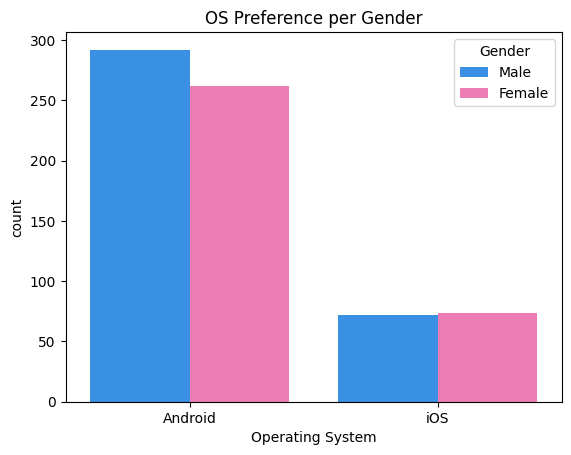

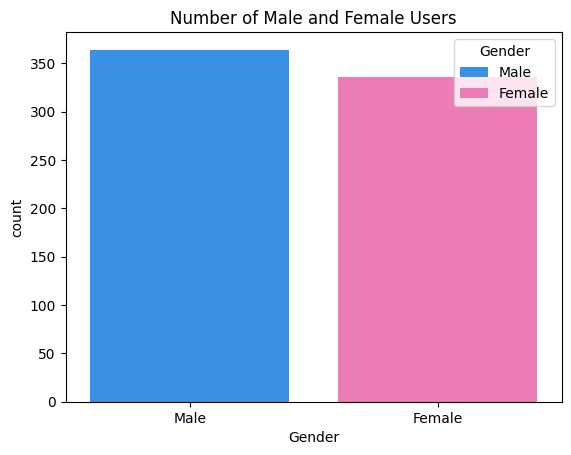

In [12]:
# Grouped count plot
sns.countplot(data=df1, x="Operating System", hue="Gender", palette={"Male":"dodgerblue","Female":"hotpink"}, legend=True) # [2][3]
plt.title("OS Preference per Gender")
plt.show()

# Male Female split
sns.countplot(data=df1, x="Gender", hue="Gender", palette={"Male":"dodgerblue","Female":"hotpink"}, legend=True)
plt.title("Number of Male and Female Users")
plt.show()

The gender preference in operating system can be observed by creating a countplot comparing the number of Android devices versus iOS devices owned by men as well as for women (r4). The graph "OS Preference per Gender" shows a higher count for men using Android device versus the number of women using Android devices while also showing a slightly higher number of women using iOS devices compared to men using iOS devices despite the number of women in the data being slightly smaller then the number of men as seen in the "Number of Male and Female Users" graph. This shows that women prefer devices with the iOS operating system over Android.

#### Insight 9 - User Behavior Class and App Usage Time

Each user behaviour class corresponds to a range of app usage time.

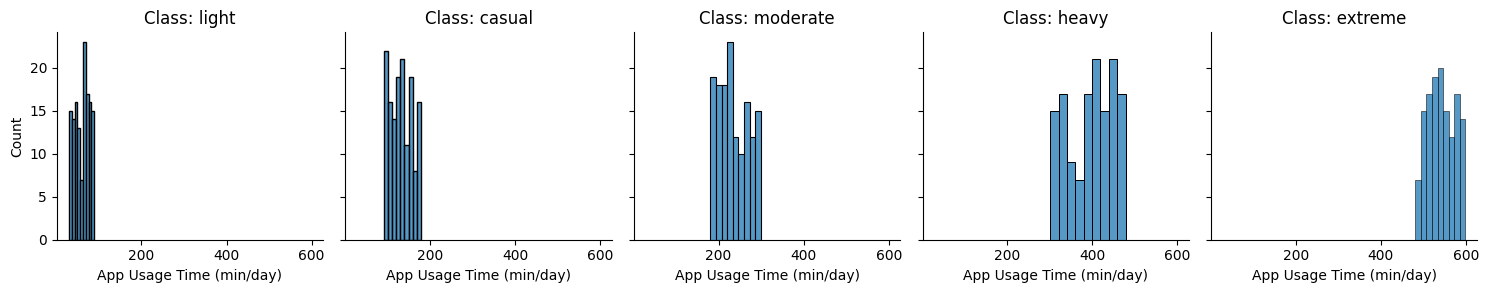

In [107]:
# Splitting the data per behaviour class
g = sns.FacetGrid(df1, col="User Behavior Class")  # Split by behavior class
g.map(sns.histplot, "App Usage Time (min/day)")

# Apply custom labels by modifying the title template
category_labels = {1:"light",2:"casual",3:"moderate",4:"heavy",5:"extreme"}
for ax, title in zip(g.axes.flat, g.col_names):
  ax.set_title(f"Class: {category_labels.get(title, title)}")
plt.show()

To observe the ranges of app usage time that correspond the user behaviour classes we need to split the data into the five classes and produce the historgram for each with respect to the usage time (r7). By doing this we observe that each histogram seems almost disjoint if not completely disjoint from that of the other classes. This suggests that each behavior class corresponds to a range of app usage time values (exmaple: moderate = ~175 to 300).

#### Insight 10 - Correlation Between the Number of Apps Installed and Screen On Time

There's a strong correlation between the number of apps installed and the screen on time

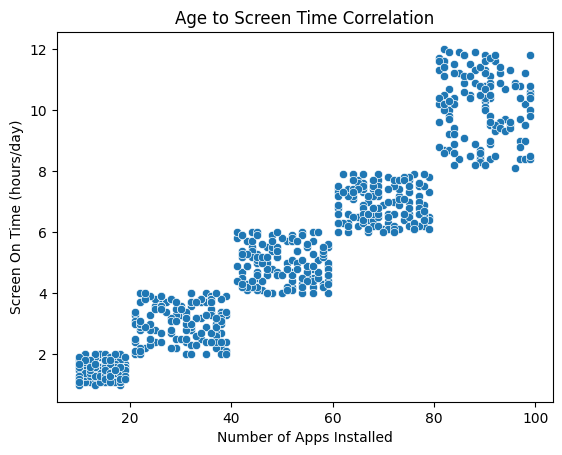

                            Data Usage (MB/day)  Screen On Time (hours/day)
Data Usage (MB/day)                    1.000000                    0.941322
Screen On Time (hours/day)             0.941322                    1.000000


In [10]:
# Scatter plot for # apps to screen time
sns.scatterplot(data=df1, x="Number of Apps Installed", y="Screen On Time (hours/day)")
plt.title("# of Apps to Screen Time Correlation")
plt.show()

# Quantify the correlation between screen on time and # of apps installed
print(df1[['Data Usage (MB/day)', 'Screen On Time (hours/day)']].corr()) # [4]

We can observe the correlation between the number of apps installed and the screen on time by creating a scatter plot and observing the dispersion of the points (r6). When observing the graph we see a strong positive correlation where as the number of apps installed increases the screen on time increases as well. The strength of this correlation is also measured using Pearson correlation analysis where we observe an |r| value of 0.94 which is classified as "very high correlation". The "blocky" appearance of the scatter plot in this case is likely due to the generated nature of the dataset where each block represents the different thresholds for data generation. This is the likeliest cause as an organically collected data set would be more prone to noise and data collected by a survey would should a smaller amount of unique values.

## Dataset 2 - IoT Monitoring of Water Quality and Tilapia

**Introduction:** This analysis aims to identify patterns and insights useful in fish keeping. These patterns and insights can be useful for biologist or fish farmer aiming to keep a healthy fish population or identify potential health markers.

**Dataset Description:** This dataset authored by Jocelyn Dumlao contains 6 months of water quality and tilapia health data used to identify patterns in fish keeping. It's comprised of 4383 data points and of 15 feature columns:

* **Datetime:** Date and time of each reading.
* **Month:** Data collection month (January to June).
* **Average Fish Weight (g):** Average weight of the tilapia fish in grams.
* **Survival Rate (%):** Percentage of fish survival during the monitoring period.
* **Disease Occurrence (Cases):** Number of disease cases observed.
* **Temperature (°C):** Water temperature readings.
* **Dissolved Oxygen (mg/L):** Levels of dissolved oxygen in the water.
* **pH:** Water pH values.
* **Turbidity (NTU):** Water turbidity measured in Nephelometric Turbidity Units (NTU).
* **Oxygenation Automatic:** Indicates if automatic oxygenation was applied (Yes/No).
* **Oxygenation Interventions:** Oxygenation interventions applied (Yes/No).
* **Corrective Interventions:** Number of corrective measures taken.
* **Thermal Risk Index:** Indicates if the thermal risk is "High" or "Normal."
* **Low Oxygen Alert:** Shows "Critical" if DO levels are below 5 mg/L, otherwise "Safe."
* **Health Status:** Fish health status, showing "At Risk" or "Stable" based on thermal and oxygen risk alerts.

In [8]:
# Read dataset from public github repo
df2 = pd.read_excel("https://raw.githubusercontent.com/IsaacLafond/CSI-4142---Fundamentals-of-Data-Science/main/Assignment%201/datasets/Data_Model_IoTMLCQ_2024.xlsx")

### Insights

#### Insight 1 - Average Fish Weight per Season

Tilapia will lose weight come summer.

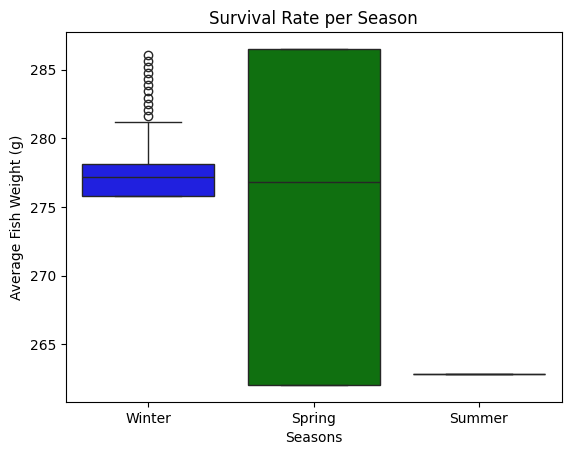

In [137]:
# Create a copy of the data to avoid change with replace
i1_copy = df2.copy()

# Group month values into seasons
i1_copy["Month"].replace("January", "Winter")
i1_copy["Month"].replace("February", "Winter")
i1_copy["Month"].replace("March", "Spring")
i1_copy["Month"].replace("April", "Spring")
i1_copy["Month"].replace("May", "Spring")
i1_copy["Month"].replace("June", "Summer")
i1_copy["Month"].replace("July", "Summer")

# Boxplot showing the survival rate per season (ie months after grouped)
sns.boxplot(data=i1_copy, x="Month", y="Average Fish Weight (g)", hue="Month", palette={"Winter":"blue","Spring":"green","Summer":"yellow"})
plt.title("Average Weight per Season")
plt.xlabel("Seasons")
plt.show()

To visualize the weight trend of Tilipia per season, we can create a boxplot with respect to the average fish weight for each season (r3). In order to group the data into seasons, we replace each month with their respective season (January/Febuary->Winter, March/April/May->Spring, June/July->Summer). When observing the resulting graph "Average Weight per Season", we see that winter shows little variaiton in the fish weight while spring shows high fluctuation before dropping in summer. We can then conclude that the coming of summer also suggests weight loss in Tilapia.

#### Insight 2 - Dissolved Oxygen and Survival Rate Correlation

Higher dissolved oxygen values correlate to a higher survival rate.

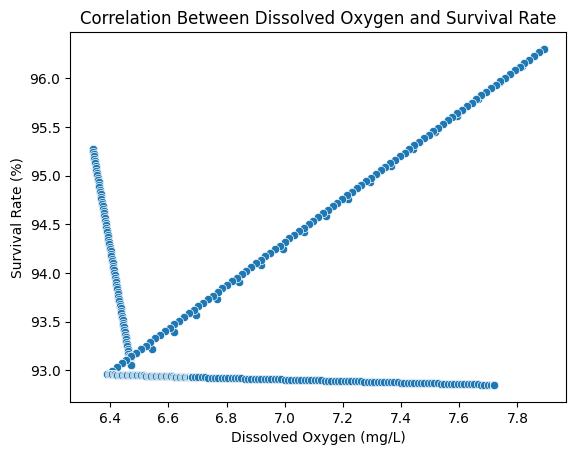

In [141]:
# Dissolved oxygen to survival scatterplot
sns.scatterplot(data=df2, x="Dissolved Oxygen (mg/L)", y="Survival Rate (%)")
plt.title("Correlation Between Dissolved Oxygen and Survival Rate")
plt.show()

In order to observe the correlation between Dissolved Oxygen and Survival we need to create a scatter plot (r6). When observing the resulting graph "Correlation Between Dissolved Oxygen and Survival Rate", we see a strong positive correlation where an increase in Dissolved Oxygen results in an increase in Survival Rate.

#### Insight 3 - Correlation between Dissolved Oxygen and Fish Weight

A higher amount of dissolved oxygen correlates to higher fish weight.

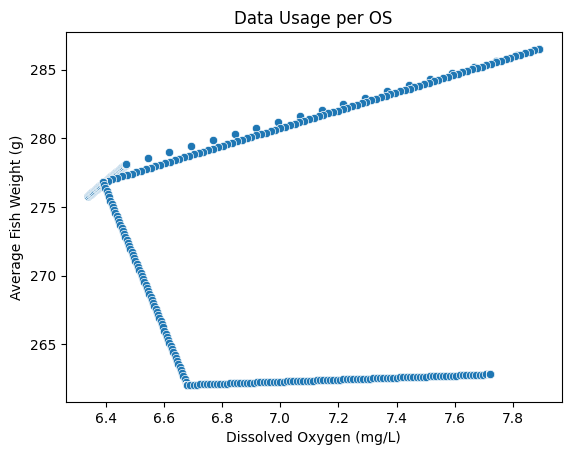

In [154]:
sns.scatterplot(data=df2, x="Dissolved Oxygen (mg/L)", y="Average Fish Weight (g)")
plt.title("Data Usage per OS")
plt.show()

# **Conclusion**

In conclusion, analyzing mobile device usage identified usage patterns as well as tendancy relating to users and their devices that would useful in marketing devices to consumers. When analyzing the fish health data, correlations could be established that point to trends in fish keeping that would be useful for fish farmer or biologist in their research.



# **References**

[1] Week 2 EDA case study slides (part 1 and 2)

[2] ChatGPT: Prompt="I've created a coutplot that shows the user count per gender for android and ios using the following line of code: sns.countplot(data=df1, x="Operating System", hue="Gender", legend=True)
Can you help me make so that the color for male is blue and pink for female?"

[3] Plot colors: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

[4] ChatGPT: Prompt="How can I quantify the correlation between 2 values in a pandas dataframe?"

[5] ChatGPT: Prompt="Say I have a dataset with 5 categories of device types. How can I order the device types in ascending order of the number of occurrences to show them in that order a Seaborn graph? I'd like the device type that has the least representation to appear first and the device with the most last."